# 1) Téléchargement des données

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sys
import os
import numpy as np 

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')
my_local_drive="/content/gdrive/My Drive/Colab Notebooks/TER/Claims2"
sys.path.append(my_local_drive)
%cd $my_local_drive
! ls

Mounted at /content/gdrive/
/content/gdrive/My Drive/Colab Notebooks/TER/Claims2
 cities.csv				        claimtweet.csv
'claim_mappings_gold - mappings_test_s2v.tsv'   claimtweetref.csv
 claims.csv				        TweetsCOV19.tsv


In [ ]:
df=pd.read_csv('claim_mappings_gold - mappings_test_s2v.tsv', sep='\t',skiprows=6) ## On ajoute l'optiokn pour supprimer les mauvaises lignes
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Annotations       583 non-null    object 
 1   Score             584 non-null    float64
 2   CR Author A       584 non-null    object 
 3   CR Author B       584 non-null    object 
 4   Review URL A      584 non-null    object 
 5   Review URL B      584 non-null    object 
 6   Text Fragments A  584 non-null    object 
 7   Text Fragments B  584 non-null    object 
 8   Entities A        584 non-null    object 
 9   Entities B        584 non-null    object 
 10  Keywords A        0 non-null      float64
 11  Keywords B        0 non-null      float64
 12  Citations A       584 non-null    object 
 13  Citations B       584 non-null    object 
 14  URI A             584 non-null    object 
 15  URI B             584 non-null    object 
dtypes: float64(3), object(13)
memory usage: 73.1

,Annotations,Score,CR Author A,CR Author B,Review URL A,Review URL B,Text Fragments A,Text Fragments B,Entities A,Entities B,Keywords A,Keywords B,Citations A,Citations B,URI A,URI B
0,E,1.060032,politifact,politifact,http://www.politifact.com/wisconsin/statements...,http://www.politifact.com/wisconsin/statements...,Milwaukee County Executive Chris Abele says co...,Milwaukee County Executive Chris Abele says co...,"David_Clarke_(sheriff),Chris_Abele,Chris_Abele","David_Clarke_(sheriff),Chris_Abele,Chris_Abele",NaN,NaN,http://www.cbs58.com/news/local-news/More-Bus-...,http://www.cbs58.com/news/local-news/More-Bus-...,http://data.gesis.org/claimskg/creative_work/3...,http://data.gesis.org/claimskg/creative_work/3...
1,E,1.035284,politifact,politifact,http://www.politifact.com/wisconsin/statements...,http://www.politifact.com/wisconsin/statements...,Milwaukee County executive candidate Chris Abe...,Milwaukee County executive candidate Chris Abe...,"Chris_Abele,Scott_Walker_(politician),Scott_Wa...","Chris_Abele,Scott_Walker_(politician),Scott_Wa...",NaN,NaN,https://www.youtube.com/watch?v=Nkjmoht6RXo&fe...,https://www.youtube.com/watch?v=Nkjmoht6RXo&fe...,http://data.gesis.org/claimskg/creative_work/7...,http://data.gesis.org/claimskg/creative_work/7...
2,E,1.031731,politifact,politifact,http://www.politifact.com/wisconsin/statements...,http://www.politifact.com/wisconsin/statements...,Tom Barrett says gubernatorial rival Scott Wal...,Tom Barrett says gubernatorial rival Scott Wal...,"Tom_Barrett_(Wisconsin_politician),Scott_Walke...","Tom_Barrett_(Wisconsin_politician),Scott_Walke...",NaN,NaN,"https://www.youtube.com/watch?v=PZOuufgoMFI, h...","https://www.youtube.com/watch?v=PZOuufgoMFI, h...",http://data.gesis.org/claimskg/creative_work/f...,http://data.gesis.org/claimskg/creative_work/f...
3,E*,1.015787,politifact,politifact,http://www.politifact.com/truth-o-meter/statem...,http://www.politifact.com/truth-o-meter/statem...,Mitt Romney says Barack Obama 'could have gott...,Paul Ryan says the Obama administration ‘water...,"Mitt_Romney,Barack_Obama,Hezbollah,Hamas,Iran,...","Barack_Obama,Paul_Ryan,Joe_Biden,Martha_Raddat...",NaN,NaN,http://www.fas.org/sgp/crs/mideast/RS20871.pdf...,"http://www.c-spanvideo.org/clip/4027905, http:...",http://data.gesis.org/claimskg/creative_work/f...,http://data.gesis.org/claimskg/creative_work/d...
4,ST,1.015759,politifact,politifact,http://www.politifact.com/truth-o-meter/statem...,http://www.politifact.com/truth-o-meter/statem...,"Newt Gingrich says Freddie Mac, electric co-op...","Gingrich repeats claim that Freddie Mac, credi...","Newt_Gingrich,Freddie_Mac,Ron_Paul,Michele_Bac...","Freddie_Mac,Newt_Gingrich,PolitiFact,Governmen...",NaN,NaN,"http://www.nreca.coop/Pages/default.aspx, http...",https://www.politifact.com/truth-o-meter/state...,http://data.gesis.org/claimskg/creative_work/8...,http://data.gesis.org/claimskg/creative_work/8...


In [ ]:
docA = df["Text Fragments A"]
docB = df["Text Fragments B"]

# 2) Ingénierie des donneés

**2.1) Installation et import des Bibliothèques**

In [ ]:
# Instyallation des bibliothèques spécifiques
!pip install langdetect
!pip install contractions

     |████████████████████████████████| 981 kB 4.2 MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993242 sha256=4d4fef800bfcf38f091ce07dcc64b2748fbb5d7adee9f96a134a9bd57f597746
  Stored in directory: /root/.cache/pip/wheels/c5/96/8a/f90c59ed25d75e50a8c10a1b1c2d4c402e4dacfa87f3aff36a
Successfully built langdetect
     |████████████████████████████████| 287 kB 4.3 MB/s 
     |████████████████████████████████| 106 kB 40.4 MB/s 


In [ ]:
## Importation des modules pour l'ingénieri des données 

#Sickit learn met régulièrement à jour des versions et #indique des futurs warnings.
#ces deux lignes permettent de ne pas les afficher. import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
# librairies générales
import pickle
import pandas as pd
from scipy.stats import randint 
import numpy as np
import string
import time
import base64
import re
import sys
import contractions
# librairie affichage
import matplotlib.pyplot as plt
import seaborn as sns
import wordcloud
## detection de language
import langdetect
import nltk
from nltk import sent_tokenize
from nltk.tokenize import word_tokenize 
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer 
from nltk import RegexpParser
# il est possible de charger l'ensemble des librairies en une seule fois
# décocher le commentaire de la ligne ci-dessous 
nltk.download('all')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from nltk import pos_tag
nltk.download('tagsets')
nltk.download("stopwords")
nltk.download('wordnet')
from nltk.corpus import stopwords
import spacy
nlp = spacy.load('en')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(stopwords.words('english')) 
## Vectorisation
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer


[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloadin

In [ ]:
nltk.download('tagsets') 
#nltk.help.upenn_tagset()

[nltk_data] Downloading package tagsets to /root/nltk_data...
[nltk_data]   Package tagsets is already up-to-date!


True

**2.2) Visualisation**



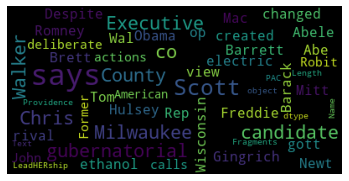

Document A  0      Milwaukee County Executive Chris Abele says co...
1      Milwaukee County executive candidate Chris Abe...
2      Tom Barrett says gubernatorial rival Scott Wal...
3      Mitt Romney says Barack Obama 'could have gott...
4      Newt Gingrich says Freddie Mac, electric co-op...
                             ...                        
579    Rep. Brett Hulsey says Wisconsin has created f...
580    Has Scott Walker changed his view on ethanol m...
581    Despite deliberate actions, Scott Walker calls...
582    Former R.I. gubernatorial candidate John Robit...
583    American LeadHERship PAC says Providence has h...
Name: Text Fragments A, Length: 584, dtype: object


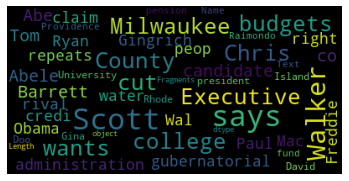

Document B 0      Milwaukee County Executive Chris Abele says co...
1      Milwaukee County executive candidate Chris Abe...
2      Tom Barrett says gubernatorial rival Scott Wal...
3      Paul Ryan says the Obama administration ‘water...
4      Gingrich repeats claim that Freddie Mac, credi...
                             ...                        
579    Is Scott Walker right that there are more peop...
580    Scott Walker wants to cut college budgets by 1...
581    Scott Walker wants to cut college budgets by 1...
582    University of Rhode Island president David Doo...
583    Gina Raimondo says Providence's pension fund h...
Name: Text Fragments B, Length: 584, dtype: object


In [ ]:
def WordCloudVisualisayion(text,title=False):
  wc = wordcloud.WordCloud(background_color='black', max_words=100,max_font_size=35)
  wc = wc.generate(str(text)) 
  fig = plt.figure(num=1) 
  plt.axis('off')
  plt.imshow(wc, cmap=None) 
  plt.show()
  if (title!=False):
    print (title, text)
  else:
    print("Document ", text )
WordCloudVisualisayion(docA, "Document A ")
WordCloudVisualisayion(docB, "Document B")

**2.3) Nettoyage**

In [ ]:
def MyCleanText(X,## Une phrase
               lowercase=False, # mettre en minuscule
               removestopwords=False, # supprimer les stopwords
               removedigit=False, # supprimer les nombres  
               getstemmer=False, # conserver la racine des termes
               getlemmatisation=False, # lematisation des termes 
               typeselection=False, #
               typetab=[] # Vide par défault 
              ):
    
    ##Pré-traitement obligatoire##
    sentence=str(X)## Type check
    # suppression des caractères spéciaux
    sentence = re.sub(r'[^\w\s]',' ', sentence)
    # suppression de tous les caractères uniques
    sentence = re.sub(r'\s+[a-zA-Z]\s+', ' ', sentence)
    # substitution des espaces multiples par un seul espace
    sentence = re.sub(r'\s+', ' ', sentence, flags=re.I)

    # decoupage en mots
    tokens = word_tokenize(sentence)

    if lowercase:
          tokens = [token.lower() for token in tokens]
    # suppression ponctuation
    table = str.maketrans('', '', string.punctuation)
    words = [token.translate(table) for token in tokens]
    # suppression des tokens non alphabetique ou numerique
    words = [word for word in words if word.isalnum()]
    
    # suppression des tokens numerique
    if removedigit:
        words = [word for word in words if not word.isdigit()]

    # suppression des stopwords
    if removestopwords:
        words = [word for word in words if not word in stop_words]

     # Sélection des types 
    if typeselection:
      pos = nltk.pos_tag(words)
      if len(typetab)>0:
        selective_pos = typetab
      else:
        selective_pos = ['NN','VB','RB']# Valeur par défault 
      selective_pos_words = []
      selective_words=[]
      for word,tag in pos:
        if tag in selective_pos: 
           selective_pos_words.append((word,tag)) 
           selective_words.append(word)
      words = selective_words

    # lemmatisation
    if getlemmatisation:
        lemmatizer=WordNetLemmatizer()
        words = [lemmatizer.lemmatize(word)for word in words]
        
    # racinisation
    if getstemmer:
        ps = PorterStemmer()
        words=[ps.stem(word) for word in words]

    ## Regroupement et retour   
    sentence= ' '.join(words) 
    return sentence 

phrasetest=MyCleanText(docA[0],lowercase=True, # mettre en minuscule
               removestopwords=True, # supprimer les stopwords
               removedigit=True, # supprimer les nombres  
               getstemmer=False, # conserver la racine des termes
               getlemmatisation=False,#) # lematisation des termes 
               typeselection=False,
              typetab=[])

class TextNormalizer(BaseEstimator, TransformerMixin):
    def __init__(self, 
                 removestopwords=False, # suppression des stopwords
                 lowercase=False,# passage en minuscule
                 removedigit=False, # supprimer les nombres  
                 getstemmer=False,# racinisation des termes 
                 getlemmatisation=False, # lemmatisation des termes  
                 typeselection=False,
                 typetab=[]
                ):
        
        self.lowercase=lowercase
        self.getstemmer=getstemmer
        self.removestopwords=removestopwords
        self.getlemmatisation=getlemmatisation
        self.removedigit=removedigit
        self.typeselection=typeselection
        self.typetab=typetab

    def transform(self, X, **transform_params):
        # Nettoyage du texte
        X=X.copy() # pour conserver le fichier d'origine
        return [MyCleanText(text,lowercase=self.lowercase,
                            getstemmer=self.getstemmer,
                            removestopwords=self.removestopwords,
                            getlemmatisation=self.getlemmatisation,
                            removedigit=self.removedigit,
                            typeselection=self.typeselection,
                            typetab=self.typetab) for text in X] ##pour chaque phrase

    def fit(self, X, y=None, **fit_params):
        return self
    
    def fit_transform(self, X, y=None, **fit_params):
        return self.fit(X).transform(X)

    def get_params(self, deep=True):
        return {
            'lowercase':self.lowercase,
            'getstemmer':self.getstemmer,
            'removestopwords':self.removestopwords,
            'getlemmatisation':self.getlemmatisation,
            'removedigit':self.removedigit,
            'typeselection':self.typeselection,
        }    
    
    def set_params (self, **parameters):
        for parameter, value in parameters.items():
            setattr(self,parameter,value)
        return self

**2.4) Vectorisation**

In [ ]:
text_normalizer=TextNormalizer(lowercase=True)  
# d'appliquer fit.transform pour appliquer les pré-traitements
text_cleaned=text_normalizer.fit_transform(docA)
print ("texte après application des pré-traitements")
print (text_cleaned)  
#'tfidf__max_df': (0.25, 0.5, 0.75),
    #'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3)],
    #'clf__estimator__alpha': (1e-2, 1e-3)   
def TFIDF(text,ngram_range=(2,2)): 
  tfidf=TfidfVectorizer(ngram_range=ngram_range,)
  vector_tfidf=tfidf.fit_transform(text)
  return vector_tfidf

texte après application des pré-traitements
['milwaukee county executive chris abele says county buses are no less safe now than year or two ago', 'milwaukee county executive candidate chris abele says opponent jeff stone scott walker', 'tom barrett says gubernatorial rival scott walker eliminated economic development office during recession', 'mitt romney says barack obama could have gotten crippling sanctions against iran he did not', 'newt gingrich says freddie mac electric co ops and credit unions are similar organizations', 'recovery gov shows jobs in congressional districts that don exist', 'msnbc host fact checks clinton foundation conspiracy theory video', 'rick scott budget includes some big tax cuts but not all for you', 'josh mandel campaign says sherrod brown owns ohio horrendous job numbers', 'u senate candidate barry hinckley says incumbent sen sheldon whitehouse voted for 525 billion tax hike on the middle class', 'house speaker john boehner says obama economists figure 

# 3) Topic Matching par Clustering / Réduction de dimensions 

3.0) Définition des mesures statistiques

In [ ]:
def precision(VP,FP):
  return(VP/(VP+FP))
def rappel(VP,FN):
  return(VP/(VP+FN))
def fscore(VP,FP,FN):
  return(VP/(VP+(FP+FN)/2))
def seeresult(x,ylabel,seuil=60.5,ylegende="Précision (%)",xlegende="Nombre de Clusters",titre="Évolution de la précision en fonction du nombre de clusters",pourcentage=True):
  largeur = 0.5
  plt.bar(x,ylabel,largeur)#,linestyle='--', marker='o', label='line with marker') 
  ## https://moonbooks.org/Articles/Diagramme-en-bâtons-avec-Matplotlib/ for barplot tuto
  plt.scatter([i for i in x],ylabel+largeur/2.0,color='k',s=10)
  plt.title(titre)
  plt.xlabel(xlegende)
  plt.ylabel(ylegende)
  plt.xlim(x.min(),x.max())
  plt.ylim(ylabel.min(),ylabel.max())
  plt.show()
  plt.title("Distribution des résultats")
  plt.boxplot(ylabel)
  plt.show()
  if pourcentage==True: 
    print("Max : ",round(ylabel.max(),2),"%")
    print("Min : ",round(ylabel.min(),2),"%")
    print("Moyene : ",round(np.average(ylabel),2),"%")
    print("Écart-type : ",round(np.std(ylabel),2),"%")
    print("Y = plus de ",seuil,"% pour x prenant les valeurs",np.where(ylabel>seuil)[0]+1)
  else: 
    print("Max : ",round(ylabel.max(),2))
    print("Min : ",round(ylabel.min(),2))
    print("Moyene : ",round(np.average(ylabel),2))
    print("Écart-type : ",round(np.std(ylabel),2))
    print("Y = plus de ",seuil," pour x prenant les valeurs",np.where(ylabel>seuil)[0]+1)
  

##3.1) KMeans

Construction du modèle dans une fonction, visualisation des annotations

In [ ]:
from sklearn.cluster import KMeans
TN=TextNormalizer(lowercase=True,getstemmer=True)
Y=df["Annotations"]
print(docA.size,docB.size)
docA.iloc[0]
## Test de cocaténation et d'indextion des DF 
#dftest=pd.concat([docA,docB],axis=0)
#print(dftest.size)
#dftest.head()
#dftest[:docA.size].size
#dftest[docA.size:].size

## Voir la distribution des topics
def SeeTopics(text,labels,n,verbose=1,lenvis=5,size1=1):
  if (verbose>0):
    labelsdf=pd.DataFrame(data=labels,columns=["labels"])
    for i in range(n):
      if len(labelsdf[labelsdf["labels"]==i])>lenvis:
        res=text.loc[text.index.intersection(labelsdf[labelsdf["labels"]==i].sample(n=lenvis).index)]
      else : 
        res = text.loc[text.index.intersection(labelsdf[labelsdf["labels"]==i].sample(n=len(labelsdf[labelsdf["labels"]==i])).index)]
      if size1 != 1: ### Taille du premier doc dans le dataframe text
        ndoc1=sum(labelsdf[labelsdf["labels"]==i].index<labels.size1)
        ndoc2=sum(labelsdf[labelsdf["labels"]==i].index>=labels.size1)
      else : 
        ndoc1=sum(labelsdf[labelsdf["labels"]==i].index<=labels.size/2)
        ndoc2=sum(labelsdf[labelsdf["labels"]==i].index>labels.size/2)
      print("Label : ",i,"taille : ",labelsdf[labelsdf["labels"]==i].size,
            "Éléments du premier document : ",ndoc1,", Éléments du deuxième document : ",ndoc2,
            "\n",res,"\n")
  return labelsdf
## Fonction à utiliser  
def TextToLabel(text,TN,n=2,init='k-means++',max_iter=100,n_init=10,random_state=123,verbose=0,lenvis=5,size1=1):
  X=TN.fit_transform(text) 
  tf=TFIDF(X)
  kmeans = KMeans(n_clusters=n,init=init, 
            max_iter=max_iter, n_init=n_init, verbose=0, random_state=random_state).fit(tf)
  labels = kmeans.fit_predict(tf)
  score=kmeans.score(tf)
  if (verbose>0):
    SeeTopics(text,labels,n,lenvis=lenvis)
  return labels,score
### K-Means
def KmeansCompare2doc(docA,docB,Y,TN,n=2,verbose=0,init='k-means++',max_iter=100,n_init=10,random_state=123):
  ## Calcul des labels
  dflab=pd.concat([docA,docB],axis=0)
  labels,score=TextToLabel(dflab,TN,n=n,init=init, 
            max_iter=max_iter, n_init=n_init, random_state=random_state)#,init='k-means++',max_iter=100,n_init=10,random_state=123)
  labelA=labels[:docA.size]
  labelB=labels[docA.size:]
  ## Création du DF
  labelApd=pd.DataFrame(data=labelA,columns=["labelA"])
  labelBpd=pd.DataFrame(data=labelB,columns=["labelB"])
  if verbose >0:
    print("Labels A \n",labelA,"\n \n")
    print("Labels B \n",labelB,"\n \n")
  dataframeT=pd.concat([docA, labelApd,docB,labelBpd,Y], axis=1)
  ## Calcul de résultat
  VP,FP,VN,FN=0,0,0,0
  for i in range(len(labelA)):
    if ((labelA[i]==labelB[i])and((Y[i]=="E")or(Y[i]=="E*")or(Y[i]=="ST"))):
      VP+=1
    elif((labelA[i]==labelB[i])and((Y[i]!="E")and(Y[i]!="E*")and(Y[i]!="ST"))):
      FP+=1
    if((labelA[i]!=labelB[i])and((Y[i]!="E")and(Y[i]!="E*")and(Y[i]!="ST"))):
      VN+=1
    elif ((labelA[i]!=labelB[i])and((Y[i]=="E")or(Y[i]=="E*")or(Y[i]=="ST"))):
      FN+=1
  if verbose >0:
    display(dataframeT)
  return (VP,FP,VN,FN,score,dataframeT)#VP,FP,VN,FN
####### On met les DF de DocA et DocB ensemble et on réindexe
docBcop=docB.copy()
#docBcop=docBcop.reindex(np.array(range(docB.size))+docB.size+1)
## reindexing https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.set_index.html
#display(docBcop.head())
#df.reset_index(drop=True)
testreset=pd.concat([docA,docBcop],axis=0)
#print(testreset.iloc[1000])
testreset=testreset.reset_index(drop=True)## On change les indices 
#print(testreset.iloc[600])
TextToLabel(testreset,TN,n=10,verbose=1,lenvis=5)
#KmeansCompare2doc(docA,docB,Y,TN,verbose=0,n=20,max_iter=100)

584 584
Label :  0 taille :  467 Éléments du premier document :  219 , Éléments du deuxième document :  248 
 44      Ed Schultz says Walmart workers rely on $5,800...
114     Donald Trump says NAFTA killed millions of job...
133     Hillary Clinton faults Donald Trump for hoping...
595     Milwaukee County executive candidate Jeff Ston...
1034    Barack Obama, in State of the Union, says wome...
dtype: object 

Label :  1 taille :  362 Éléments du premier document :  177 , Éléments du deuxième document :  185 
 15                           Why Crimea matters to Russia
495     Rick Scott dodges answers by invoking Fifth Am...
560     Self-defense deaths in Florida have increased ...
703     Health Choices Commissioner does not decide yo...
1091                     Obama does not reject his family
dtype: object 

Label :  2 taille :  28 Éléments du premier document :  16 , Éléments du deuxième document :  12 
 326    Michele Bachmann says IRS ''will have the abil...
361    Chris Christi

(array([1, 0, 0, ..., 0, 1, 3], dtype=int32), -1093.7698025059149)

###3.1.2) Visualisation pour différents n clusters

On fait des tests pou plsieurs nombre de clustrs, et on affiche la précision

In [ ]:
n=50#200
precision_tab=np.zeros(n)
rappel_tab=np.zeros(n)
fscore_tab=np.zeros(n)
score_tab=np.zeros(n)
for i in range(n):
  VP,FP,VN,FN,score,df=KmeansCompare2doc(docA,docB,Y,TN,verbose=0,n=i+1,max_iter=100)
  precision_tab[i]=precision(VP,FP)
  rappel_tab[i]=rappel(VP,FN)
  fscore_tab[i]=fscore(VP,FP,FN)
  score_tab[i]=score

On affiche ici (pour éviter de recalculer si on change les figures)

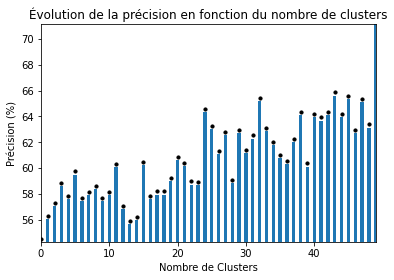

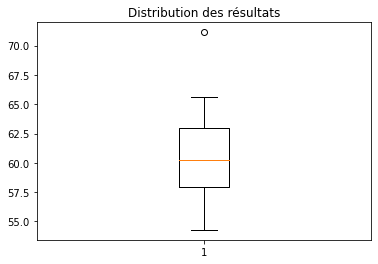

Max :  71.14 %
Min :  54.28 %
Moyene :  60.67 %
Écart-type :  3.26 %
Y = plus de  63 % pour x prenant les valeurs [25 26 33 39 41 42 43 44 45 46 48 49 50]


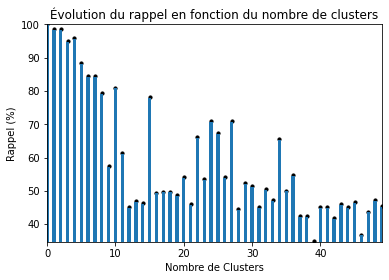

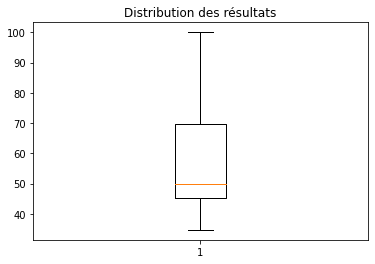

Max :  100.0 %
Min :  34.7 %
Moyene :  58.68 %
Écart-type :  18.26 %
Y = plus de  65 % pour x prenant les valeurs [ 1  2  3  4  5  6  7  8  9 11 16 23 25 26 28 35]


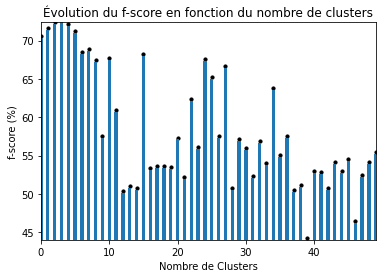

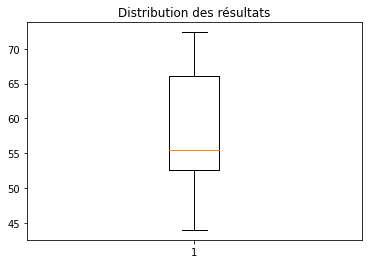

Max :  72.38 %
Min :  44.0 %
Moyene :  58.1 %
Écart-type :  7.7 %
Y = plus de  65 % pour x prenant les valeurs [ 1  2  3  4  5  6  7  8  9 11 16 25 26 28]


In [ ]:
xtab = np.array(range(n))
xtab = [i + 1 for i in xtab]
seeresult(np.array(range(n)),precision_tab*100,seuil=63,)
seeresult(np.array(range(n)),rappel_tab*100,seuil=65,ylegende="Rappel (%)",titre="Évolution du rappel en fonction du nombre de clusters")
seeresult(np.array(range(n)),fscore_tab*100,seuil=65,ylegende="f-score (%)",titre="Évolution du f-score en fonction du nombre de clusters")
#seeresult(np.array(range(n)),score_tab,seuil=65,ylegende="score ",titre="Évolution du score en fonction du nombre de clusters")

##**3.2) LDA**

3.2.0) Importation des modules

In [ ]:
import gensim
from gensim.models import CoherenceModel
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from pprint import pprint
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use','says','say','claim'])
## Transformation en phrases d'une chaine de caractères
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
## Suppression des stopwords d'un texte 
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]
## Lemmatisation d'un texte 
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out
 ## Permet de transformer un texte en corpus
def text2corpus(text2):
  data2= TN.fit_transform(text2)
  data_words2 = list(sent_to_words(data2))
# remove stop words
  data_words2 = remove_stopwords(data_words2)
  data_lemmatized = lemmatization(data_words2, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])
# Create Dictionary
  id2word = corpora.Dictionary(data_lemmatized)
# Create Corpus
  texts = data_lemmatized
  corpus = [id2word.doc2bow(text) for text in texts]
  return texts,corpus,id2word
## Permet de créer un modèle de LDA
def makemodel(text,num_topics=10,verbose=0):
  texts,corpus,id2word=text2corpus(text)
  lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
  if verbose>0:
    pprint(lda_model.print_topics())
  return text,corpus,id2word,lda_model
## Permet d'obtenir les topics d'un corpus pour un modèle
def getmaxtopic(corpus,doc_lda):
  doc_lda = lda_model[corpus] ## On utilise le modèlke sur le corpus donné
  max_topics = [max(sent, key=lambda x: x[1])[0] for sent in doc_lda] ## On ressors le topic avec la plus haute probabilité 
  return max_topics
## Calcul de résultat
def testlabel(labelA,labelB,Y):
  VP,FP,VN,FN=0,0,0,0
  for i in range(len(labelA)):
    if ((labelA[i]==labelB[i])and((Y[i]=="E")or(Y[i]=="E*")or(Y[i]=="ST"))):
      VP+=1
    elif((labelA[i]==labelB[i])and((Y[i]!="E")and(Y[i]!="E*")and(Y[i]!="ST"))):
      FP+=1
    if((labelA[i]!=labelB[i])and((Y[i]!="E")and(Y[i]!="E*")and(Y[i]!="ST"))):
      VN+=1
    elif ((labelA[i]!=labelB[i])and((Y[i]=="E")or(Y[i]=="E*")or(Y[i]=="ST"))):
      FN+=1
  return (VP,FP,VN,FN)#VP,FP,VN,FN

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


###3.2.1) Visualisation des mots constituant un modèle

In [ ]:
### Paramétrisation 
n=10 ## Nombre de phrases à tester
dec=300 ## Décalage dans le texte 
lensample = 100 ## Sample dans les textes pour le modèle
textA=docB[0+dec:n+dec].dropna()
textB=docA[0+dec:n+dec].dropna()
## Création du modèle
# Jeu de donées pour créer le modèle
jeutest=pd.concat([docA,docBcop],axis=0) ## Concaténation des eux de données
jeutest=jeutest.reset_index(drop=True)## On change les indices 
jeutest=jeutest.sample(n=lensample) 
text,corpus,id2word,lda_model=makemodel(jeutest,verbose=1)
## Création des corpus
textsA,corpusA,id2wordA=text2corpus(textA)
textsB,corpusB,id2wordB=text2corpus(textB)
## Affectation des topics
topicsA=getmaxtopic(corpusA,lda_model)
topicsB=getmaxtopic(corpusB,lda_model)
print(topicsA,"\n",topicsB)

[(0,
  '0.029*"high" + 0.029*"campaign" + 0.015*"year" + 0.015*"would" + '
  '0.015*"tax" + 0.015*"state" + 0.015*"barack" + 0.015*"nation" + '
  '0.015*"onli" + 0.015*"sex"'),
 (1,
  '0.022*"would" + 0.022*"state" + 0.022*"percent" + 0.022*"nation" + '
  '0.022*"pay" + 0.022*"head" + 0.022*"sell" + 0.022*"bond" + 0.022*"say" + '
  '0.022*"dure"'),
 (2,
  '0.043*"job" + 0.029*"would" + 0.029*"dure" + 0.015*"year" + 0.015*"tax" + '
  '0.015*"mandat" + 0.015*"cut" + 0.015*"ad" + 0.015*"elig" + 0.015*"gain"'),
 (3,
  '0.076*"year" + 0.051*"job" + 0.027*"last" + 0.027*"similar" + 0.027*"organ" '
  '+ 0.027*"new" + 0.027*"credit" + 0.027*"union" + 0.027*"number" + '
  '0.027*"gain"'),
 (4,
  '0.044*"support" + 0.023*"nation" + 0.023*"rate" + 0.023*"state" + '
  '0.023*"record" + 0.023*"perform" + 0.023*"economi" + 0.023*"local" + '
  '0.023*"big" + 0.023*"top"'),
 (5,
  '0.035*"flop" + 0.035*"pledg" + 0.035*"flip" + 0.035*"romney" + '
  '0.035*"taxpay" + 0.035*"pay" + 0.035*"benefit" + 0.03

###3.2.2) Test des affectations de topic en faisant varier le nombre de topics


In [ ]:
### Paramétrisation, construction des sample
ntop=50 ## Nombre de topics max
lensampletopic = 250 ## Sample dans les textes pour le modèle
lensampletest = 25 ## Sample dans les textes pour le test
# Tirage du jeu de donées pour créer le modèle
jeutopic=pd.concat([docA,docBcop],axis=0)
jeutopic=jeutopic.reset_index(drop=True)## On change les indices 
jeutopic=jeutopic.sample(n=lensampletopic)
## Tirage au hasard des jeux de test
textA=docA.sample(n=lensampletest) # Prend 100 au hasard
textB=docB.loc[docB.index.intersection(textA.index)] # Prend 100 aux mêmes indixes (dazns l'ordre)
textA=docA.loc[docA.index.intersection(textA.index)] ## Remet dans l'ordre
annot=Y.loc[Y.index.intersection(textA.index)]
# On met les indices à la suite (plus simple)
textA=textA.reset_index(drop=True)
textB=textB.reset_index(drop=True)
annot=annot.reset_index(drop=True)
#print(textA.index,textB.index,annot.index) ## Pour vérifier les indices
## Création des corpus
textsA,corpusA,id2wordA=text2corpus(textA)
textsB,corpusB,id2wordB=text2corpus(textB)
## INitialisation des tableaux de mesure
precision_tab_lda=np.zeros(ntop)
rappel_tab_lda=np.zeros(ntop)
fscore_tab_lda=np.zeros(ntop)
coherence_tab=np.zeros(ntop)
complexity_tab=np.zeros(ntop)
"""
## Pour mesurer la cohérence
data2= TN.fit_transform(textA)
data_words2 = list(sent_to_words(data2))
# remove stop words
data_words2 = remove_stopwords(data_words2)
data_lemmatized = lemmatization(data_words2, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)
"""
for i in range(ntop):
  ## Création du modèle
  texts,corpus,id2word,lda_model=makemodel(jeutopic,num_topics=i+2,verbose=0) 
  ## Affectation des topics
  topicsA=getmaxtopic(corpusA,lda_model)
  topicsB=getmaxtopic(corpusB,lda_model)
  #### Pour tester les topics : il faut retrouver les indices ? Ou alors uste on prend dans textA la colonne label..
  VP,FP,VN,FN=testlabel(topicsA,topicsB,annot)
  precision_tab_lda[i]=precision(VP,FP)
  rappel_tab_lda[i]=rappel(VP,FN)
  fscore_tab_lda[i]=fscore(VP,FP,FN)
  # Compute Coherence Score
  #coherence_model_lda = CoherenceModel(model=lda_model, texts=texts,corpus=corpus, dictionary=id2word, coherence='c_v')
  #print(coherence_model_lda.get_coherence())
  #coherence_tab[i] = coherence_model_lda.get_coherence()
  #complexity_tab[i]=lda_model.log_perplexity(corpusA)

###3.2.2.2) Affichage des mesures

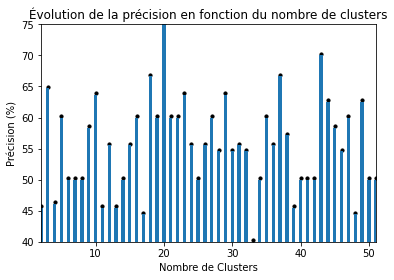

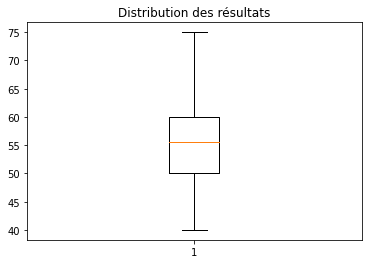

Max :  75.0 %
Min :  40.0 %
Moyene :  55.42 %
Écart-type :  7.37 %
Y = plus de  63 % pour x prenant les valeurs [ 2  9 17 19 22 28 36 42]


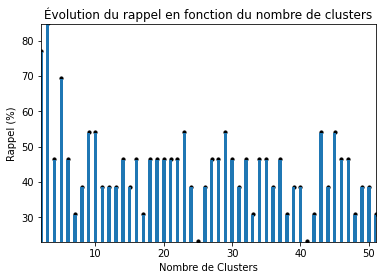

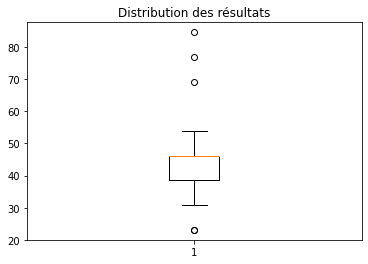

Max :  84.62 %
Min :  23.08 %
Moyene :  43.69 %
Écart-type :  11.46 %
Y = plus de  65 % pour x prenant les valeurs [1 2 4]


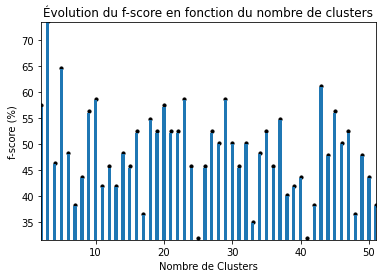

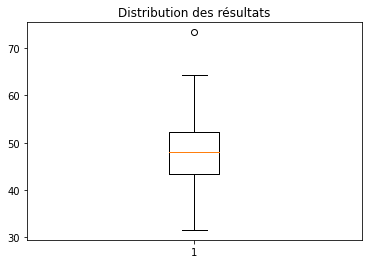

Max :  73.33 %
Min :  31.58 %
Moyene :  48.25 %
Écart-type :  8.34 %
Y = plus de  65 % pour x prenant les valeurs [2]


In [ ]:
xtab = np.array(range(ntop))
xtab = [i + 2 for i in xtab]
seeresult(np.array(xtab),precision_tab_lda*100,seuil=63,)
seeresult(np.array(xtab),rappel_tab_lda*100,seuil=65,ylegende="Rappel (%)",titre="Évolution du rappel en fonction du nombre de clusters")
seeresult(np.array(xtab),fscore_tab_lda*100,seuil=65,ylegende="f-score (%)",titre="Évolution du f-score en fonction du nombre de clusters")
#seeresult(len(coherence_tab),coherence_tab,seuil=100000,ylegende="Cohérence ",titre="Évolution de la cohérence du modèle en fonction du nombre de clusters",pourcentage=False)
#seeresult(np.array(xtab),complexity_tab,seuil=100000,ylegende="Complexité ",titre="Évolution de la complexité du modèle en fonction du nombre de clusters",pourcentage=False)

# 4) Tweets vs Claims

##4.1) Traitement des données TweetsCov19

4.1.0) Enregistrement des données

In [ ]:
columns=['Tweet Id','Username','Timestamp','Followers','Friends','Retweets','Favorites','Entities','Sentiment','Mentions','HashTags','URLs']
tweetsdf=pd.read_csv('TweetsCOV19.tsv', sep='\t', names=columns) ## On ajoute l'optiokn pour supprimer les mauvaises lignes
tweetsdf.info()
display(tweetsdf.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8077794 entries, 0 to 8077793
Data columns (total 12 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   Tweet Id   int64 
 1   Username   object
 2   Timestamp  object
 3   Followers  int64 
 4   Friends    int64 
 5   Retweets   int64 
 6   Favorites  int64 
 7   Entities   object
 8   Sentiment  object
 9   Mentions   object
 10  HashTags   object
 11  URLs       object
dtypes: int64(5), object(7)
memory usage: 739.5+ MB


,Tweet Id,Username,Timestamp,Followers,Friends,Retweets,Favorites,Entities,Sentiment,Mentions,HashTags,URLs
0,1178791787386814465,35234fe4a19cc1a3336095fb3780bcc1,Mon Sep 30 22:00:37 +0000 2019,619,770,0,0,null;,2 -1,null;,null;,null;
1,1178791985106153472,ea4592f39636d87af8fb4b17b7e2e4c0,Mon Sep 30 22:01:24 +0000 2019,36365,19344,13,17,nazi:Nazism:-2.742538749414189;blood money:Blo...,1 -4,null;,null;,https://twitter.com/himalayahawk/status/117766...
2,1178793230223183872,bf05d1888dd974fa4a8679c25e2ead03,Mon Sep 30 22:06:21 +0000 2019,5018,1933,0,0,vaccine:Vaccine:-2.6651530673745762;anti vaxxe...,2 -1,null;,null;,https://goo.gl/fb/uoeiPk:-:
3,1178795172206919680,eb8a99bca8945eab1d006750e9b75518,Mon Sep 30 22:14:04 +0000 2019,2219,971,0,0,muse:Muse_%28band%29:-2.1677823918620867;talki...,2 -1,null;,null;,null;
4,1178798309491822592,00695cf79d60e86a5d0f872f4358337a,Mon Sep 30 22:26:32 +0000 2019,9009,4943,26,89,people of northern ireland:People_of_Northern_...,2 -1,null;,VFS,null;


4.1.1) Traitement des nuls 

On sélectionne les entités non nulles dans le dataframe

In [ ]:
#tweetsdf_nonans=tweetsdf.dropna()
tweetsdf["Entities"].iloc[100]
print("Entrées totales  : ",tweetsdf["Entities"].size,", entrées sans nulls : ",tweetsdf["Entities"].size-tweetsdf[tweetsdf["Entities"]=="null;"]["Entities"].size)
# union of the series
union = pd.Series(np.union1d(tweetsdf["Entities"], tweetsdf[tweetsdf["Entities"]=="null;"]["Entities"]))
  
# intersection of the series
#intersect = pd.Series(np.intersect1d(tweetsdf["Entities"], tweetsdf[tweetsdf["Entities"]=="null;"]["Entities"]))
  
# uncommon elements in both the series 
notcommonseries = union[~union.isin(pd.Series(np.intersect1d(tweetsdf["Entities"], tweetsdf[tweetsdf["Entities"]=="null;"]["Entities"])))]

Entrées totales  :  8077794 , entrées sans nulls :  5654150


4.1.2) Récupération des données d'intérêt

On élimine ici les scores, qui ne seront pas utiles dans notre cas

In [ ]:
import re
import random 
def MyCleanTweet(tweet):
  return re.sub(r'\:.*?\;', ' ', tweet)
## Enleve les éléments entre : et ; 
phrase = notcommonseries.iloc[random.randint(0, notcommonseries.size)]
print("Original : ",phrase)
tst=re.sub(r'\:.*?\;', ' ', phrase)
print("En enlevant les éléments entre ':' et ';': ",tst)
## Enleve tout les chiffres : pas bon
print("En enlevant tout les chiffres : ",re.sub("\S*\d\S*", "", phrase).strip())

Original :  this is the end:This_Is_the_End:-1.4355907145173183;covid 19:Coronavirus_disease_2019:-1.535776454600282;what if:What_If_%28comics%29:-2.820269806431985;
En enlevant les éléments entre ':' et ';':  this is the end covid 19 what if 
En enlevant tout les chiffres :  this is the


##4.1.2) Traitement de ClaimsKG pour obtenir des entités

4.1.2 - a ) On commence par enregistrer les données

In [ ]:
claims=pd.read_csv('claims.csv', sep=',') ## On ajoute l'optiokn pour supprimer les mauvaises lignes
display(claims.head())
claims.info()

,id,text,date,truthRating,ratingName,author,headline,named_entities_claim,named_entities_article,keywords,source,sourceURL,link,language
0,http://data.gesis.org/claimskg/claim_review/be...,Malia Obama cashed a $1.2 million tax refund c...,Unknown,-1,OTHER,Unknown,Did Malia Obama Cash a $1.2 Million Check?,"Facebook,Fan Fiction,Junk News,Malia Obama,Sno...",Malia Obama,NaN,truthorfiction,https://www.truthorfiction.com,https://www.truthorfiction.com/did-malia-obama...,English
1,http://data.gesis.org/claimskg/claim_review/8a...,High diver is saved from jumping into a draine...,Unknown,-1,OTHER,Unknown,High Diver Saved By Cross,"Cincinnati Post,Islam,Scripture lesson,Univers...",shadow on the wall,ASP Article,snopes,http://www.snopes.com,https://www.snopes.com/fact-check/high-and-mig...,English
2,http://data.gesis.org/claimskg/claim_review/c2...,'And the revenue generated by drilling off Vir...,2012-02-15,2,MIXTURE,Jim Moran,Moran says drilling off Virginia's coast will ...,"Alaska,American Petroleum Institute,Atlantic O...",NaN,"Energy,State Finances",politifact,http://www.politifact.com,http://www.politifact.com/virginia/statements/...,English
3,http://data.gesis.org/claimskg/claim_review/1e...,Health insurance companies pay CEOs $24 millio...,2009-09-15,2,MIXTURE,Health Care for America Now,Health care advocacy group blasts insurers for...,"Aetna,Assurant,Bloomberg News,Cigna,Coventry H...",NaN,"Corporations,Health Care",politifact,http://www.politifact.com,http://www.politifact.com/truth-o-meter/statem...,English
4,http://data.gesis.org/claimskg/claim_review/0b...,Ted Cruz said that veterans should start selli...,Unknown,1,FALSE,Unknown,Ted Cruz: Vets Should Sell Cookies for Funding...,"David Nelson,James Morrison,John Scalzi,Republ...",Ted Cruz,"ASP Article, Not Necessarily The News",snopes,http://www.snopes.com,https://www.snopes.com/fact-check/cruz-cookies/,English


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   id                      10000 non-null  object
 1   text                    10000 non-null  object
 2   date                    10000 non-null  object
 3   truthRating             10000 non-null  int64 
 4   ratingName              10000 non-null  object
 5   author                  10000 non-null  object
 6   headline                9566 non-null   object
 7   named_entities_claim    9549 non-null   object
 8   named_entities_article  6464 non-null   object
 9   keywords                8735 non-null   object
 10  source                  10000 non-null  object
 11  sourceURL               10000 non-null  object
 12  link                    10000 non-null  object
 13  language                10000 non-null  object
dtypes: int64(1), object(13)
memory usage: 1.1+ MB


4.1.2 - b ) On traite le texte des claims

In [ ]:
#claimstest = claims["text"]
text_normalizer=TextNormalizer(lowercase=True,removestopwords=True,removedigit=True,typeselection=True,typetab=['NN','VB','RB','ADV'])  
# d'appliquer fit.transform pour appliquer les pré-traitements
text_cleaned=text_normalizer.fit_transform(claims["text"])

4.1.2 - c ) On compare le claim avec le texte traité, les entités, et les tweets

In [ ]:
number = random.randint(0,claims["named_entities_claim"].size-1)
print("Claim : ",text_cleaned[number])
print("Entities : ",re.sub(',', ' ', claims["named_entities_claim"].iloc[number]))
print("Tweet : ",MyCleanTweet(notcommonseries.iloc[random.randint(0, notcommonseries.size)]))

Claim :  student mistook assignment
Entities :  Abraham Wald Annals of Mathematical Statistics Bachelor’s degree College Mathematics Journal Crystal Cathedral Do you realize Don Knuth George Bernard Dantzig George Dantzig Gerald Ford Good Will Hunting National Medal of Science RAND Corporation Robert Schuller Stanford University UC Berkeley University of California  Berkeley University of Maryland University of Michigan World War II galley proof mathematician operations research power of positive thinking televangelist the power
Tweet :  tactical voting fulmar 


4.1.3 ) On transforme les éléments en Dataframe

In [ ]:
test_tweets_df=pd.DataFrame([MyCleanTweet(tweet) for tweet in notcommonseries],columns=["tweet"])
test_claims_df=pd.DataFrame(text_cleaned,columns=["claim"])

4.1.3 -b) Sampling d'éléments des deux bases de donnnées, création d'une troisième base mixte

In [ ]:
nsample=(1500)
tweet_sample=test_tweets_df["tweet"].sample(nsample,replace=True)
claim_sample=test_claims_df["claim"].sample(nsample,replace=True)
samples=pd.concat([tweet_sample,claim_sample],axis=0)
samples=samples.reset_index(drop=True)
print("Random tweet : ",samples.iloc[random.randint(0, nsample-1)], "\nRandom Claim : ",
samples.iloc[random.randint(nsample, nsample*2-1)])

Random tweet :  sars cov 2 covid 19 some good news  
Random Claim :  ago newly president obama congress plan nearly hold unemployment percent


##4.2) Test avec KMeans

In [ ]:
print("Tweets de 0 à ",nsample-1,", claims de ",nsample," à ",nsample*2-1,"\n")
top=10
labels,score=TextToLabel(samples,TN,n=top,verbose=0,lenvis=5)
SeeTopics(samples,labels,top,verbose=1)

Tweets de 0 à  1499 , claims de  1500  à  2999 

Label :  0 taille :  2837 Éléments du premier document :  1374 , Éléments du deuxième document :  1463 
 583     google wallet quarantine weed hey you 
785         quarantine lol idk sunday scaries 
2034                             president son
2443                    president debt ceiling
2492                   teenage flu vaccination
dtype: object 

Label :  1 taille :  7 Éléments du premier document :  7 , Éléments du deuxième document :  0 
 382                              fake news lol recession 
573                                   cnn fake news epic 
892                           fake news photoshopped pic 
919                   fake news help yourself propaganda 
1117    politico insomnia fake news china face the music 
dtype: object 

Label :  2 taille :  9 Éléments du premier document :  2 , Éléments du deuxième document :  7 
 361                          nancy pelosi green new deal 
1319                    nancy pelosi fa

,labels
0,0
1,0
2,0
3,3
4,0
...,...
2995,0
2996,0
2997,0
2998,0


##4.3) Test avec la LDA

In [ ]:
### Paramétrisation, construction des sample
ntop=10 ## Nombre de topics max
nsampletop=2000 ## Sample dans les textes pour le modèle
nsampletxt = 1000 ## Sample dans les textes pour le test
# Tirage du jeu de donées pour créer le modèle
tweet_sample=test_tweets_df["tweet"].sample(int(nsampletop/2),replace=True)
claim_sample=test_claims_df["claim"].sample(int(nsampletop/2),replace=True)
jeutopictests=pd.concat([tweet_sample,claim_sample],axis=0)
jeutopictest=jeutopictests.reset_index(drop=True)
#print(textA.index,textB.index,annot.index) ## Pour vérifier les indices
tweet_samplet=test_tweets_df["tweet"].sample(int(nsampletxt/2),replace=True)
claim_samplet=test_claims_df["claim"].sample(int(nsampletxt/2),replace=True)
texttest=pd.concat([tweet_samplet,claim_samplet],axis=0)
texttest=texttest.reset_index(drop=True)
## Création des corpus
textstest,corpustest,id2wordtest=text2corpus(texttest)
## Création du modèle
texts,corpus,id2word,lda_model=makemodel(jeutopictest,num_topics=ntop,verbose=1) 
## Affectation et visualisation des topics
labels=getmaxtopic(corpustest,lda_model)
SeeTopics(texttest,np.array(labels),ntop)

[(0,
  '0.036*"tax" + 0.021*"care" + 0.013*"presid" + 0.011*"spend" + 0.009*"year" '
  '+ 0.009*"parti" + 0.009*"risk" + 0.009*"come" + 0.009*"death" + '
  '0.009*"budget"'),
 (1,
  '0.022*"presid" + 0.012*"eat" + 0.012*"support" + 0.009*"trump" + '
  '0.009*"world" + 0.009*"area" + 0.009*"home" + 0.009*"rate" + 0.009*"still" '
  '+ 0.009*"stop"'),
 (2,
  '0.021*"tax" + 0.016*"nation" + 0.013*"hous" + 0.011*"presid" + '
  '0.011*"barack" + 0.011*"open" + 0.008*"even" + 0.008*"today" + 0.008*"rate" '
  '+ 0.008*"countri"'),
 (3,
  '0.025*"state" + 0.020*"govern" + 0.017*"cost" + 0.014*"child" + '
  '0.014*"time" + 0.011*"deficit" + 0.011*"almost" + 0.011*"call" + '
  '0.009*"presid" + 0.009*"debt"'),
 (4,
  '0.021*"school" + 0.015*"rate" + 0.012*"care" + 0.009*"money" + '
  '0.009*"number" + 0.009*"woman" + 0.009*"violent" + 0.006*"govern" + '
  '0.006*"state" + 0.006*"time"'),
 (5,
  '0.025*"presid" + 0.015*"care" + 0.015*"year" + 0.015*"take" + 0.013*"trump" '
  '+ 0.013*"health" + 0.

,labels
0,0
1,0
2,0
3,0
4,0
...,...
995,3
996,0
997,0
998,0


# 5) Création de la base de référence

##5.0) Définition des fonctions, importation des modules

In [ ]:
from scipy.spatial import distance
from matplotlib.ticker import PercentFormatter
import os
### Prmet de calculer la distance entre deux phrases
def dist(s1, s2, vectorizer):
    sentences = np.array([s1,s2])
    # text to vector
    all_sentences_to_vector = vectorizer.fit_transform(sentences)
    text_to_vector_v1 = all_sentences_to_vector.toarray()[0].tolist()
    text_to_vector_v2 = all_sentences_to_vector.toarray()[1].tolist()
    # distance of similarity
    cosine = distance.cosine(text_to_vector_v1, text_to_vector_v2)
    #print('Similarity of two sentences are equal to ',round((1-cosine)*100,2),'%')
    return cosine

##5.1) Fichier "mère"

In [ ]:
if os.path.isfile('claimtweet.csv'):
  claimtweet = pd.read_csv('claimtweet.csv')
  display(claimtweet.head())
else :
  print("Pas de fichier trouvé, une base va être créée\n\n")
  claimtweet=pd.DataFrame(columns=['Claim', 'Tweet','Claim Id','Tweet Id','Annotations'])
  claimtweet.to_csv('claimtweet.csv', index=False)

,Claim,Tweet,Claim Id,Tweet Id,Annotations
0,trump marriage equality go back,gay marriage fear mongering poc lol illegal al...,http://data.gesis.org/claimskg/claim_review/e0...,1249426072938131456,ST
1,rep stephen fincher farmer currently house,smokepurpp house shoes igtv quarantine sneakers,http://data.gesis.org/claimskg/claim_review/31...,1253341691597053969,N
2,lady barbara bush hurricane katrina houston as...,santa barbara city college,http://data.gesis.org/claimskg/claim_review/3f...,1189713679077404672,N
3,wage minnesota record pace unemployment income...,osun state please sir stanbic bank,http://data.gesis.org/claimskg/claim_review/51...,1251080931412230145,ST
4,john lennon election business man trump,john ioannidis covid 19 fake news sensationali...,http://data.gesis.org/claimskg/claim_review/ae...,1245498065315868674,N


##5.2) Teste des distances

5.2.0) Initialisation des variables

In [ ]:
tfidf=TfidfVectorizer()
text_normalizer=TextNormalizer(lowercase=True,removestopwords=True,removedigit=True,typeselection=True,typetab=['NN','VB','RB','ADV'])  
tweets_non_null=tweetsdf[tweetsdf["Entities"]!="null;"].index
claims_non_null=claims[claims["named_entities_claim"].notnull()].index
claimtexts=text_normalizer.fit_transform(claims["text"])

###5.2.1) Calcul des tests

In [ ]:
ntest=100000
distab=np.zeros(ntest)
for i in range(ntest):
  tweet=tweetsdf.iloc[random.choice(tweets_non_null)]
  claim=claimtexts[random.choice(claims_non_null)]
  tweettext=MyCleanTweet(tweet["Entities"])
  if claim !="":
    distab[i]=dist(claim,tweettext,tfidf)
distab=distab[distab<1.0]
distab=distab[distab>0]
distab.sort()

/usr/local/lib/python3.7/dist-packages/scipy/spatial/distance.py:720: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)
/usr/local/lib/python3.7/dist-packages/scipy/spatial/distance.py:720: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)
/usr/local/lib/python3.7/dist-packages/scipy/spatial/distance.py:720: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)
/usr/local/lib/python3.7/dist-packages/scipy/spatial/distance.py:720: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)
/usr/local/lib/python3.7/dist-packages/scipy/spatial/distance.py:720: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)
/usr/local/lib/python3.7/dist-packages/scipy/spatial/distance.py:720: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv

### 5.2.3) Visualisation des résultats

Éléments intéressant :  381
7eme décile :  0.9013203820201304


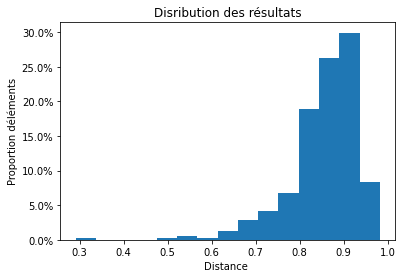

In [ ]:
print("Éléments intéressant : ",distab.size)
bins=15
#calculate deciles of data
print("7eme décile : ",np.percentile(distab, 70))
plt.hist(distab, bins, weights=np.ones(len(distab)) / len(distab),histtype='bar')
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.ylabel("Proportion déléments")
plt.xlabel("Distance ")
plt.title("Disribution des résultats")
plt.show()

## 5.3) Annotation du Dataframe

In [ ]:
count = 100000
text_normalizer=TextNormalizer(lowercase=True,removestopwords=True,removedigit=True,typeselection=True,typetab=['NN','VB','RB','ADV'])
i=0
for i in range(count):
  ## On tire au hasard un claim et un tweet non nuls
  ntweet=random.choice(tweets_non_null)
  nclaim=random.choice(claims_non_null)
  ## ON vérifi si le couple n'est pas déjà référencé 
  a=claimtweet[claimtweet["Claim Id"]==claims["id"].iloc[nclaim]].index
  b=claimtweet[claimtweet["Tweet Id"]==tweetsdf["Tweet Id"].iloc[ntweet]].index
  if (len([x for x in a if x in b]))==0:
    ## On localise les éléments, transforme, et calcule la distance
    tweet=tweetsdf.iloc[ntweet]
    claim=claimtexts[nclaim]
    tweettext=MyCleanTweet(tweet["Entities"])
    distval=dist(tweettext,claim,tfidf)
    ## Si la distance est dans l'intervalle choisi, on annote et on ajoute
    if (distval<1.0)&(distval>np.percentile(distab, 80)):
      annotation=""
      test=True
      while test:
        print("\n \nClaim : ",claims["text"].iloc[nclaim],"\nTweet : ",tweettext)
        annotation=input("\n \nHierarchy of annotations: E -> E* -> ST -> N -> O \nWhere E = Exact Match; E* = Same claim by != people; ST = Same Topic; N = No Match; O = Other  \n0 to break\n")
        test=not (annotation in ["E","E*","ST","N","O","0"])
        if test:
          print("\n**Attention seuls E, E*, ST, N, O, 0 sont acceptés**")
      ## On peut annuler si l'annotation est nulle
      if (annotation!="")&(annotation!="0"):
        newdata=np.array([claims["text"].iloc[nclaim],tweet["Entities"],claims["id"].iloc[nclaim],tweetsdf["Tweet Id"].iloc[ntweet],annotation])
        newentry=pd.DataFrame([newdata],columns=['Claim', 'Tweet','Claim Id','Tweet Id','Annotations'])
        claimtweet=pd.concat((claimtweet,newentry),axis=0)
        #display(claimtweet.head())
      if annotation=="0" :
        print("\nArrêt anticipé\n\n")
        break
print("Fin de l'enregistrement ")

/usr/local/lib/python3.7/dist-packages/scipy/spatial/distance.py:720: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)



 
Claim :  Says more than 1 million Texans are jobless, the state has its highest unemployment rate in more than 20 years and joblessness doubled on Rick Perry’s watch. 
Tweet :  fanduel draftkings cfb milwaukee nhl mlb nba nfl golden state 

 
Hierarchy of annotations: E -> E* -> ST -> N -> O 
Where E = Exact Match; E* = Same claim by != people; ST = Same Topic; N = No Match; O = Other  
0 to break
N


/usr/local/lib/python3.7/dist-packages/scipy/spatial/distance.py:720: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)
/usr/local/lib/python3.7/dist-packages/scipy/spatial/distance.py:720: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)
/usr/local/lib/python3.7/dist-packages/scipy/spatial/distance.py:720: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)
/usr/local/lib/python3.7/dist-packages/scipy/spatial/distance.py:720: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)
/usr/local/lib/python3.7/dist-packages/scipy/spatial/distance.py:720: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)
/usr/local/lib/python3.7/dist-packages/scipy/spatial/distance.py:720: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv


 
Claim :  Cesar Sayoc is a Democrat posing as a Republican. 
Tweet :  french parliament italy members of parliament democrat party army chief of staff 

 
Hierarchy of annotations: E -> E* -> ST -> N -> O 
Where E = Exact Match; E* = Same claim by != people; ST = Same Topic; N = No Match; O = Other  
0 to break
0

Arrêt anticipé


Fin de l'enregistrement 


## 5.4) Enregistrement du fichier

In [ ]:
print("Compte des différentes annotations")
claimtweet.Annotations.value_counts()

Compte des différentes annotations


N     397
ST    162
Name: Annotations, dtype: int64

In [ ]:
display(claimtweet[claimtweet["Annotations"]=="ST"])

,Claim,Tweet,Claim Id,Tweet Id,Annotations
0,trump marriage equality go back,gay marriage fear mongering poc lol illegal al...,http://data.gesis.org/claimskg/claim_review/e0...,1249426072938131456,ST
3,wage minnesota record pace unemployment income...,osun state please sir stanbic bank,http://data.gesis.org/claimskg/claim_review/51...,1251080931412230145,ST
10,york rep john cast vote try kill health care o...,bbc news boris johnson intensive care,http://data.gesis.org/claimskg/claim_review/80...,1247248046368280577,ST
12,health care freedom act obama takeover healthcare,telangana jesus prayer appeasement kcr lakh pr...,http://data.gesis.org/claimskg/claim_review/76...,1202142915713093632,ST
14,trump president barack government shutdown get...,ivanka trump mailonline cryptocurrency bitcoin,http://data.gesis.org/claimskg/claim_review/1f...,1241724483548975107,ST
...,...,...,...,...,...
164,july congresswoman strongly letter resignation...,mark esper munich security conference extortio...,http://data.gesis.org/claimskg/claim_review/cd...,1228829254898479104,ST
173,Labor Union Tells Supporters to Vote For U.S. ...,jeanine pirro:Jeanine_Pirro:-0.857330898331737...,http://data.gesis.org/claimskg/claim_review/db...,1236499521628233729,ST
175,trump marriage equality go back,gay marriage fear mongering poc lol illegal al...,http://data.gesis.org/claimskg/claim_review/e0...,1249426072938131456,ST
178,wage minnesota record pace unemployment income...,osun state please sir stanbic bank,http://data.gesis.org/claimskg/claim_review/51...,1251080931412230145,ST


In [ ]:
claimtweet=claimtweet.reset_index(drop=True)
display(claimtweet)
upload=input("Enregistrer ? Y/N")
if upload=="Y":
  claimtweet.to_csv('claimtweet.csv', index=False)
  print("Nouveau df : ",pd.read_csv('claimtweet.csv').head())

,Claim,Tweet,Claim Id,Tweet Id,Annotations
0,trump marriage equality go back,gay marriage fear mongering poc lol illegal al...,http://data.gesis.org/claimskg/claim_review/e0...,1249426072938131456,ST
1,rep stephen fincher farmer currently house,smokepurpp house shoes igtv quarantine sneakers,http://data.gesis.org/claimskg/claim_review/31...,1253341691597053969,N
2,lady barbara bush hurricane katrina houston as...,santa barbara city college,http://data.gesis.org/claimskg/claim_review/3f...,1189713679077404672,N
3,wage minnesota record pace unemployment income...,osun state please sir stanbic bank,http://data.gesis.org/claimskg/claim_review/51...,1251080931412230145,ST
4,john lennon election business man trump,john ioannidis covid 19 fake news sensationali...,http://data.gesis.org/claimskg/claim_review/ae...,1245498065315868674,N
...,...,...,...,...,...
368,court letter submit position statement gun ris...,wuhan institute of virology u s embassy in bei...,http://data.gesis.org/claimskg/claim_review/9d...,1254421581306179589,N
369,photograph president bill clinton billionaire ...,bill gates dementia china not a hero,http://data.gesis.org/claimskg/claim_review/e5...,1247222080954724352,N
370,news twice air time state,donald trump treason live television news media,http://data.gesis.org/claimskg/claim_review/b4...,1180133120022106112,N
371,clinton iran deal world number state sponsor t...,state of emergency japan,http://data.gesis.org/claimskg/claim_review/34...,1250871291697078278,N


                                               Claim  \
0                    trump marriage equality go back   
1         rep stephen fincher farmer currently house   
2  lady barbara bush hurricane katrina houston as...   
3  wage minnesota record pace unemployment income...   
4            john lennon election business man trump   

                                               Tweet  \
0  gay marriage fear mongering poc lol illegal al...   
1   smokepurpp house shoes igtv quarantine sneakers    
2                        santa barbara city college    
3                osun state please sir stanbic bank    
4  john ioannidis covid 19 fake news sensationali...   

                                            Claim Id             Tweet Id  \
0  http://data.gesis.org/claimskg/claim_review/e0...  1249426072938131456   
1  http://data.gesis.org/claimskg/claim_review/31...  1253341691597053969   
2  http://data.gesis.org/claimskg/claim_review/3f...  1189713679077404672   
3  http://data.ges